<a href="https://colab.research.google.com/github/ChoiJMS2/Colab_Study/blob/main/4%EC%9B%94%20%EA%B3%B5%EB%B6%80/pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 설정하기
- 1단계 : 모듈 Import
  + sys : 파이썬 인터프리터 제어 (기본 모듈)
  + sklearn : 머신러닝 라이브러리 (중요 모듈)
    * 지도학습, 비지도학습
    * 모델 선택 및 평가
    * 데이터 변환 및 데이터 불러오기
    * 계산 성능 향상
  + numpy : 과학계산, 행렬/배열 처리 및 연산, 난수생성 모듈
  + os : 운영체제 제어 (경로 지정)
  + matplotlib : 시각화 라이브러리 패키지 (중요 모듈)
  + matplotlib.pyplot : matplotlib의 하위 모듈 중 하나
    * 사용환경 인터페이스(static-machine interface) 제공
    * 자동으로 figure와 axes를 생성하며, 정의된 플롯을 얻을 수 있도록 만들어줌


In [16]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [17]:
import matplotlib as mpl
print(mpl.matplotlib_fname())

/usr/local/lib/python3.9/dist-packages/matplotlib/mpl-data/matplotlibrc


In [18]:
print(mpl.get_cachedir())

/root/.cache/matplotlib


In [19]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

# 시각화 설정
sns.set_context("talk")
sns.set_style("white")
font_title = {"color":"gray"}

# Linux 한글 사용 설정
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 펭귄 데이터셋 불러오기
df_peng = sns.load_dataset("penguins")
df_peng.dropna(inplace=True)
df_peng.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [20]:
y = df_peng["body_mass_g"]
X = df_peng.drop("body_mass_g", axis=1)
X.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex
0,Adelie,Torgersen,39.1,18.7,181.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,Female


In [21]:
# data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
# encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

# machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [23]:
def get_model_0(X_cols, degree=1, method="lr"):
    
    X_cols_ = deepcopy(X_cols)
    
    # 1-1.categorical feature에 one-hot encoding 적용
    cat_features = list(set(X_cols) & set(["species", "island", "sex"]))
    cat_transformer = OneHotEncoder(sparse=False, handle_unknown="ignore")

    # 1-2.numerical feature는 Power Transform과 Scaler를 거침
    num_features = list(set(X_cols) - set(cat_features))
    num_features.sort()
    num_transformer = Pipeline(steps=[("polynomial", PolynomialFeatures(degree=degree)), 
                                      ("scaler", RobustScaler())
                                     ])

    # 1. 인자 종류별 전처리 적용
    preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features), 
                                                   ("cat", cat_transformer, cat_features)])
    
    # 2. 전처리 후 머신러닝 모델 적용
    if method == "lr":
        ml = LinearRegression(fit_intercept=True)
    elif method == "rf":
        ml = RandomForestRegressor()

        
    # 3. Pipeline
    model = Pipeline(steps=[("preprocessor", preprocessor), 
                            ("ml", ml)])
    
    return model

In [24]:
from sklearn import set_config
set_config(display='diagram')
model_0 = get_model_0(list(X_train.columns), degree=1, method="lr")
model_0

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('polynomial',
                                                                   PolynomialFeatures(degree=1)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['bill_depth_mm',
                                                   'bill_length_mm',
                                                   'flipper_length_mm']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['sex', 'species',
                                                   'island'])])),
                ('ml', LinearRegression())])

In [25]:
X_train_pp = model_0["preprocessor"].fit_transform(X_train)
print(X_train_pp.shape)
X_train_pp[0]

(266, 12)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([ 0.        , -0.40322581, -0.86792453, -0.43956044,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ])

In [26]:
model_0.fit(X_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('polynomial',
                                                                   PolynomialFeatures(degree=1)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['bill_depth_mm',
                                                   'bill_length_mm',
                                                   'flipper_length_mm']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['sex', 'species',
                                                   'island'])])),
                ('ml', LinearRegression())])

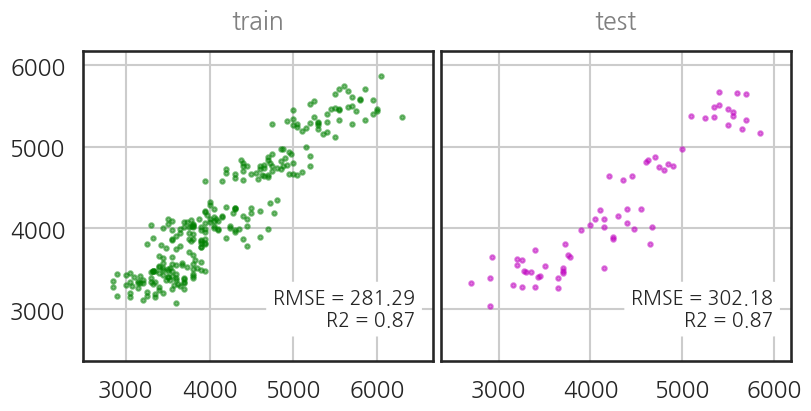

In [27]:
# parity plot
def plot_parity(model, y_true, y_pred=None, X_to_pred=None, ax=None, **kwargs):
    if not ax:
        fig, ax = plt.subplots(figsize=(5, 5))
    
    if y_pred is None:
        y_pred = model.predict(X_to_pred)
    ax.scatter(y_true, y_pred, **kwargs)
    xbound = ax.get_xbound()
    xticks = [x for x in ax.get_xticks() if xbound[0] <= x <= xbound[1]]
    ax.set_xticks(xticks)
    ax.set_xticklabels([f"{x:.0f}" for x in xticks])
    ax.set_yticks(xticks)
    ax.set_yticklabels([f"{x:.0f}" for x in xticks])
    dxbound = 0.05*(xbound[1]-xbound[0])
    ax.set_xlim(xbound[0]-dxbound, xbound[1]+dxbound)
    ax.set_ylim(xbound[0]-dxbound, xbound[1]+dxbound)
    
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    ax.text(0.95, 0.1, f"RMSE = {rmse:.2f}\nR2 = {r2:.2f}", transform=ax.transAxes, 
            fontsize=14, ha="right", va="bottom", bbox={"boxstyle":"round", "fc":"w", "pad":0.3})
    
    ax.grid(True)
    
    return ax
    
fig, axs = plt.subplots(ncols=2, figsize=(8, 4), constrained_layout=True, sharey=True)
plot_parity(model_0, y_train, X_to_pred=X_train, ax=axs[0], c="g", s=10, alpha=0.5)
plot_parity(model_0, y_test, X_to_pred=X_test, ax=axs[1], c="m", s=10, alpha=0.5)

for ax, title in zip(axs, ["train", "test"]):
    ax.set_title(title, fontdict=font_title, pad=16)

In [28]:
model_1 = get_model_0(list(X_train.columns), degree=1, method="rf")
model_1.fit(X_train, y_train)
model_1

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('polynomial',
                                                                   PolynomialFeatures(degree=1)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['bill_depth_mm',
                                                   'bill_length_mm',
                                                   'flipper_length_mm']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['sex', 'species',
                                                   'island'])])),
                ('ml', RandomForestRegressor())])

In [29]:
model_2 = get_model_0(["bill_length_mm", "species"], degree=1, method="rf")
model_2.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('polynomial',
                                                                   PolynomialFeatures(degree=1)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['bill_length_mm']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['species'])])),
                ('ml', RandomForestRegressor())])

In [30]:
from torch import optim
from torch.optim.lr_scheduler import CyclicLR

import torch
import torch.nn as nn

class RegressorModule(nn.Module): 
    def __init__(self, ninput=11, init_weights=True):
        super(RegressorModule, self).__init__()
        
        self.model = nn.Sequential(nn.Linear(ninput, 16),
                                   nn.ReLU(),
                                   nn.Linear(16, 16),
                                   nn.ReLU(),
                                   nn.Linear(16, 12),
                                   nn.ReLU(),
                                   nn.Linear(12, 8),
                                   nn.ReLU(),
                                   nn.Linear(8, 1),
                                   )
        if init_weights:
            self._initialize_weights()
        
    def forward(self, X, **kwargs):
        return self.model(X)
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

In [31]:
X_train_tensor = torch.Tensor(pd.get_dummies(X_train).astype(np.float32).values)
y_train_tensor = torch.Tensor(y_train.astype(np.float32).values)

RuntimeError: ignored

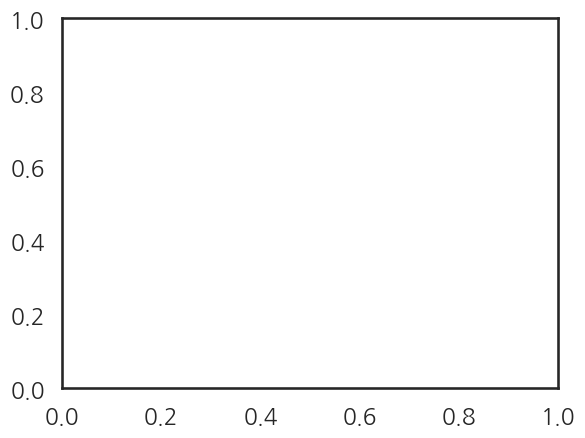

In [32]:
net = RegressorModule()

class RMSELoss(nn.Module):
    def __init__(self, eps=1e-6):
        super().__init__()
        self.mse = nn.MSELoss()
        self.eps = eps
        
    def forward(self,yhat,y):
        loss = torch.sqrt(self.mse(yhat,y) + self.eps)
        return loss
    
loss_func = RMSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

losses = []
for i in range(10000):
    optimizer.zero_grad()
    output = net.forward(X_train_tensor)
    loss = loss_func(output, y_train_tensor.view(-1, 1))
    loss.backward()
    optimizer.step()
    
    losses.append(loss)
    
plt.plot(losses)

In [ ]:
# numpy array를 pytorch tensor로 변환
X_test_tensor = torch.Tensor(pd.get_dummies(X_test).astype(np.float32).values)

# 예측값
y_pred_train_tensor = net.forward(X_train_tensor)
y_pred_test_tensor = net.forward(X_test_tensor)

# pytorch tensor를 다시 numpy array로 변환
y_pred_train = y_pred_train_tensor.detach().numpy()
y_pred_test = y_pred_test_tensor.detach().numpy()

In [ ]:
from skorch import NeuralNetRegressor
from sklearn.base import BaseEstimator, TransformerMixin

def get_model_T(X_cols, degree=1, method="lr"):
    
    X_cols_ = deepcopy(X_cols)
    
    # 1-1.categorical feature에 one-hot encoding 적용
    cat_features = list(set(X_cols) & set(["species", "island", "sex"]))
    cat_transformer = OneHotEncoder(sparse=False, handle_unknown="ignore")

    # 1-2.numerical feature는 Power Transform과 Scaler를 거침
    num_features = list(set(X_cols) - set(cat_features))
    num_features.sort()
    num_transformer = Pipeline(steps=[("polynomial", PolynomialFeatures(degree=degree)), 
                                      ("scaler", RobustScaler())
                                     ])

    # 1. 인자 종류별 전처리 적용
    preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features), 
                                                   ("cat", cat_transformer, cat_features)])
    
    # 2. float64를 float32로 변환
    class FloatTransformer(BaseEstimator, TransformerMixin):
        def __init__(self):
            pass
        def fit(self, X, y=None):
            return self
        def transform(self, x):
            return np.array(x, dtype=np.float32)
    
    # 3. 전처리 후 머신러닝 모델 적용
    if method == "lr":
        ml = LinearRegression(fit_intercept=True)
    elif method == "rf":
        ml = RandomForestRegressor()
    elif method == "torch":
        ninput = len(num_features) + 1
        if "species" in cat_features:
            ninput += 3
        if "island" in cat_features:
            ninput += 3
        if "sex" in cat_features:
            ninput += 2
            
        net = NeuralNetRegressor(RegressorModule(ninput=ninput, init_weights=False),
                         max_epochs=1000, verbose=0,
                         warm_start=True,
#                          device='cuda',
                         criterion=RMSELoss,
                         optimizer = optim.Adam,
                         optimizer__lr = 0.01
                        )
        ml = net

        
    # 3. Pipeline
    model = Pipeline(steps=[("preprocessor", preprocessor), 
                            ("float64to32", FloatTransformer()),
                            ("ml", ml)])
    
    return model

In [ ]:
model_T = get_model_T(list(X_train.columns), degree=1, method="torch")
model_T.fit(X_train, y_train.astype(np.float32).values.reshape(-1, 1))
model_T

In [ ]:
from sklearn.inspection import permutation_importance

# Linear Regression
pi_0 = permutation_importance(model_0, X_test, y_test, n_repeats=30, random_state=0)

# Random Forest
pi_1 = permutation_importance(model_1, X_test, y_test, n_repeats=30, random_state=0)

# Neural Network
pi_T = permutation_importance(model_T, X_test, y_test, n_repeats=30, random_state=0)

# 시각화
fig, axs = plt.subplots(ncols=3, figsize=(15, 5), constrained_layout=True, sharey=True)

for ax, pi, title in zip(axs, [pi_0, pi_1, pi_T], ["Linear Reg.", "Random Forest", "Neural Net"]):
    ax.barh(X_test.columns, pi.importances_mean, xerr=pi.importances_std, color="orange")
    ax.invert_yaxis()
    ax.set_xlim(0, )
    ax.set_title(title, fontdict=font_title, pad=16)